## Problem Statement

- **DOMAIN**: Banking, Marketing
- **CONTEXT**: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

- **DATA DICTIONARY**:
1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

In [114]:
df_data1=pd.read_csv('Data1.csv')
df_data2=pd.read_csv('Data2.csv')

In [115]:
df_data1.head()
df_data2.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.60,1
1,2,45,19,34,90089,3,1.50,1
2,3,39,15,11,94720,1,1.00,1
3,4,35,9,100,94112,1,2.70,2
4,5,35,8,45,91330,4,1.00,2


,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [116]:
df_data1.shape
df_data2.shape

(5000, 8)

(5000, 7)

**Both dataframes have 5000 rows. Data1 has 8 columns and Data2 has 7 columns. Only the ID column is common.**

In [117]:
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


**Data1 dataframe has no null columns**

In [118]:
df_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


**LoanOnCard column of Data2 dataframe has 20 null entries. Other columns have no null columns**

In [119]:
df_data=df_data1.merge(df_data2, on='ID')

In [120]:
df_data.shape

(5000, 14)

In [121]:
df_data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.60,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.50,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,1,NaN


**df_data is the merged dataframe**

Checking for Duplicate data

In [122]:
df_data.duplicated().sum()

0

In [123]:
cols=['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for i in cols:
    df_data[i]=df_data[i].astype('object')

In [124]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


**The specified columns are updated as objects**

In [125]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.00,2500.50,1443.52,1.00,1250.75,2500.50,3750.25,5000.00
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
CustomerSince,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
HighestSpend,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZipCode,5000.00,93152.50,2121.85,9307.00,91911.00,93437.00,94608.00,96651.00
MonthlyAverageSpend,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
Mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00
LoanOnCard,4980.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00


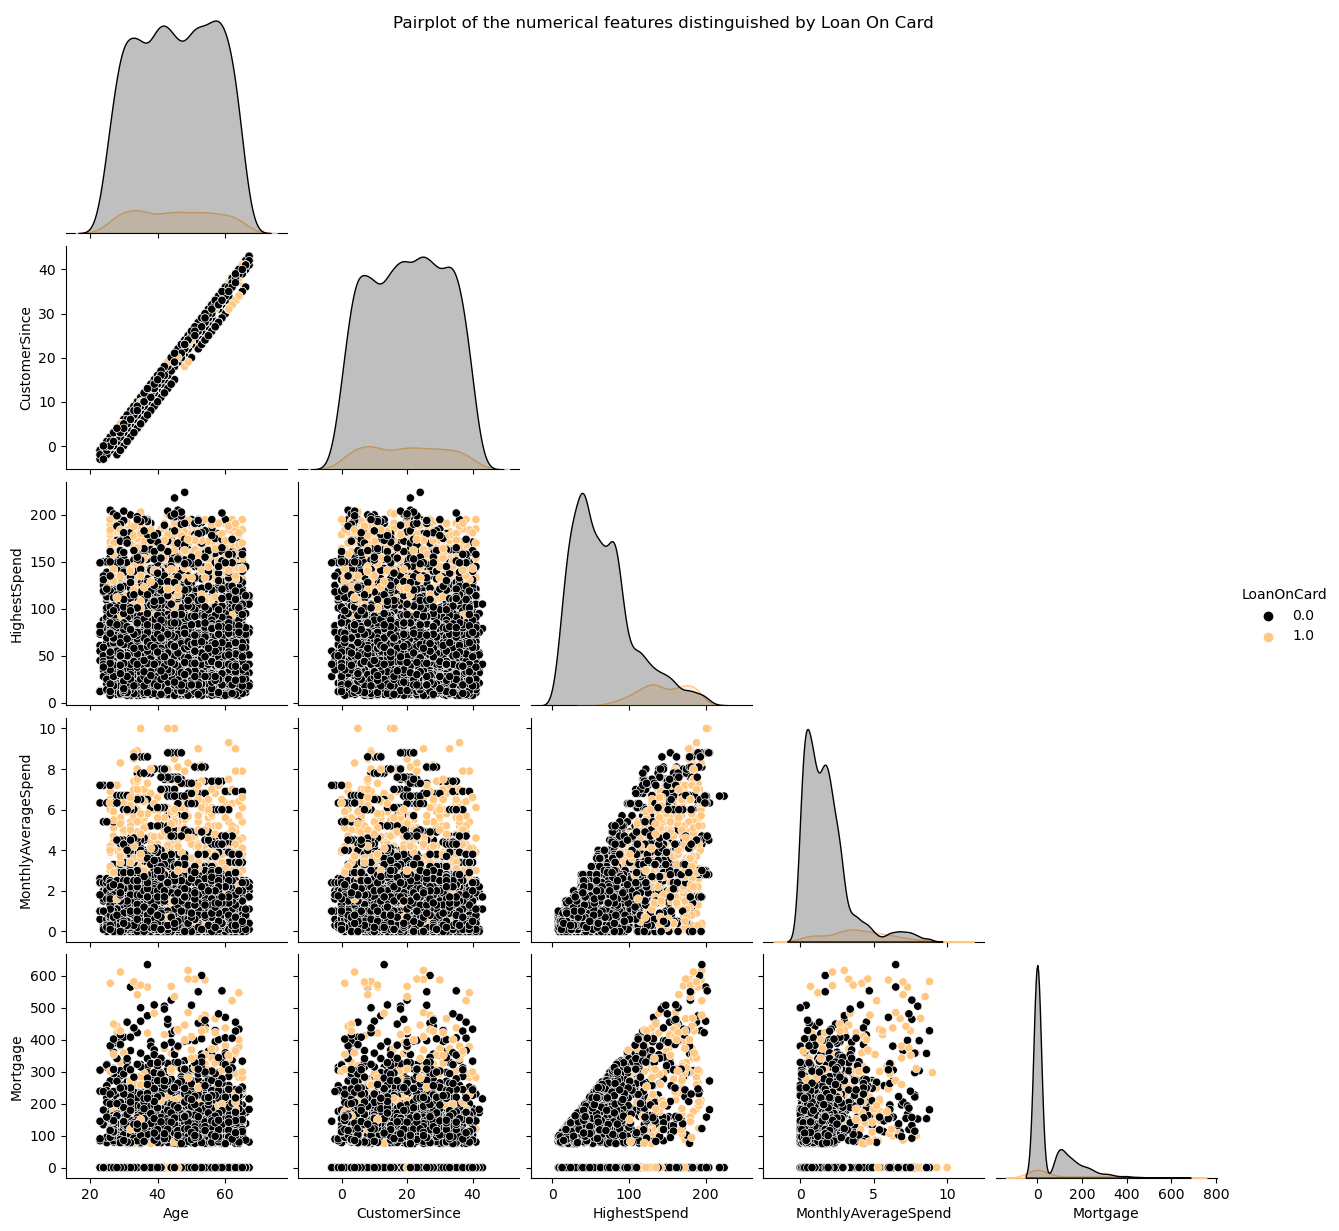

In [126]:
pp=sns.pairplot(data=df_data,vars=['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage'], hue='LoanOnCard',palette = 'copper', corner=True);
pp.fig.suptitle('Pairplot of the numerical features distinguished by Loan On Card')
plt.show();

In [127]:
df_data.corr()

,ID,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage,LoanOnCard
ID,1.00,-0.01,-0.01,-0.02,0.01,-0.02,-0.01,-0.03
Age,-0.01,1.00,0.99,-0.06,-0.03,-0.05,-0.01,-0.01
CustomerSince,-0.01,0.99,1.00,-0.05,-0.03,-0.05,-0.01,-0.01
HighestSpend,-0.02,-0.06,-0.05,1.00,-0.02,0.65,0.21,0.50
ZipCode,0.01,-0.03,-0.03,-0.02,1.00,-0.00,0.01,0.00
MonthlyAverageSpend,-0.02,-0.05,-0.05,0.65,-0.00,1.00,0.11,0.37
Mortgage,-0.01,-0.01,-0.01,0.21,0.01,0.11,1.00,0.14
LoanOnCard,-0.03,-0.01,-0.01,0.50,0.00,0.37,0.14,1.00


**We dont see strong correlation between two features, except Age and CustomerSince.**

**BoxPlot for numerical features**

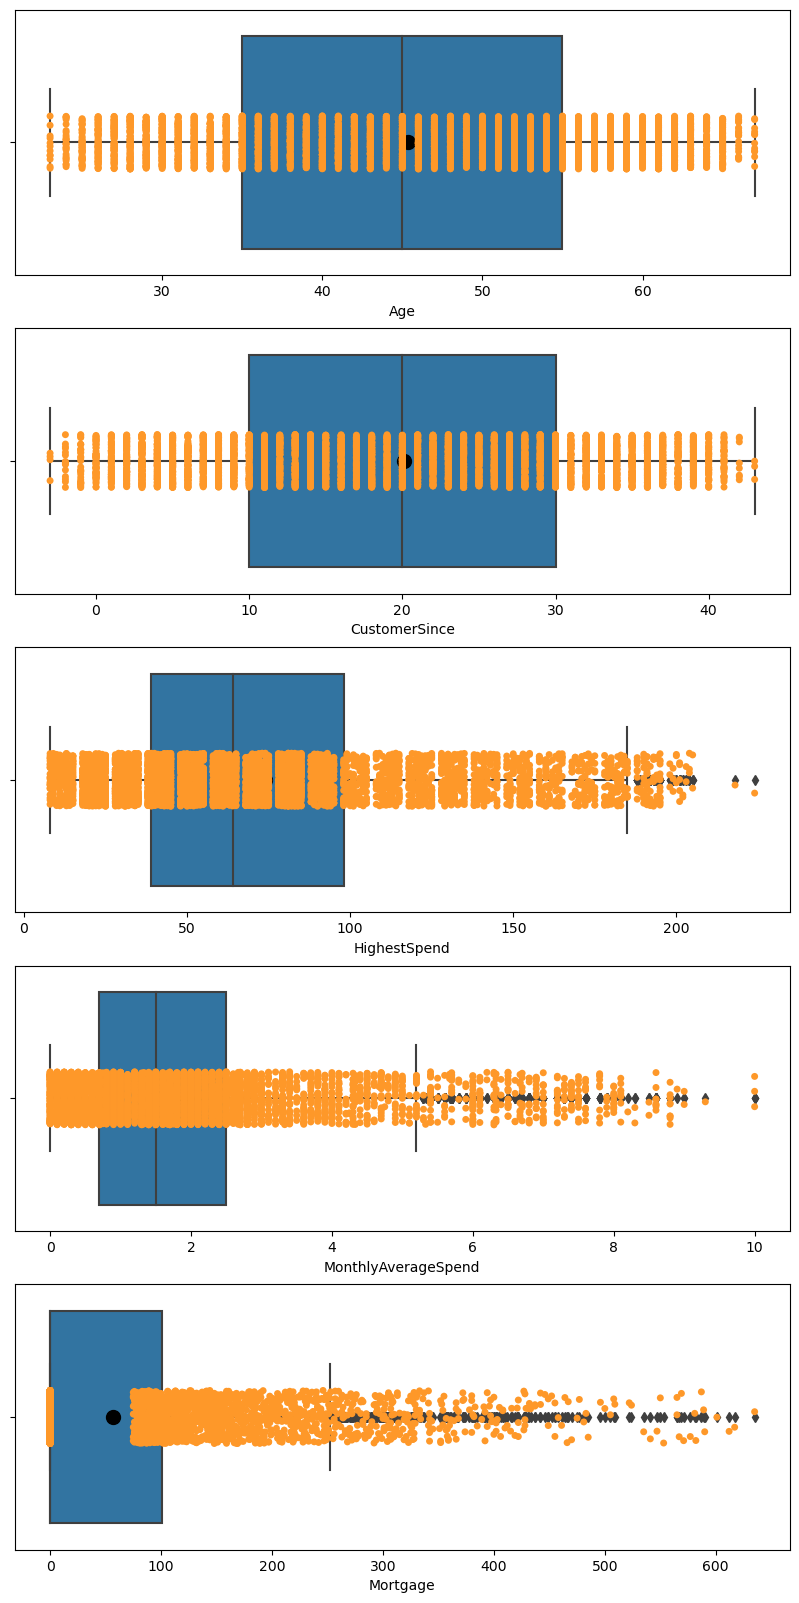

In [128]:
f5,(ax_box1,ax_box2,ax_box3,ax_box4,ax_box5)=plt.subplots(nrows=5,sharex=False,figsize=(10,20));
sns.boxplot(data=df_data,
            x='Age',
            ax=ax_box1,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"});
sns.stripplot(data=df_data,x='Age',ax=ax_box1,palette = 'YlOrBr');
sns.boxplot(data=df_data,
                 x='CustomerSince',
                 ax=ax_box2,
                 showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"});
sns.stripplot(data=df_data,x='CustomerSince',ax=ax_box2,palette = 'YlOrBr');
sns.boxplot(data=df_data,
            x='HighestSpend',
            ax=ax_box3,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                       "markersize":"10"}); 
sns.stripplot(data=df_data,x='HighestSpend',ax=ax_box3,palette = 'YlOrBr');
sns.boxplot(data=df_data,
            x='MonthlyAverageSpend',
            ax=ax_box4,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                       "markersize":"10"}); 
sns.stripplot(data=df_data,x='MonthlyAverageSpend',ax=ax_box4,palette = 'YlOrBr');
sns.boxplot(data=df_data,
            x='Mortgage',
            ax=ax_box5,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                       "markersize":"10"}); 
sns.stripplot(data=df_data,x='Mortgage',ax=ax_box5,palette = 'YlOrBr');


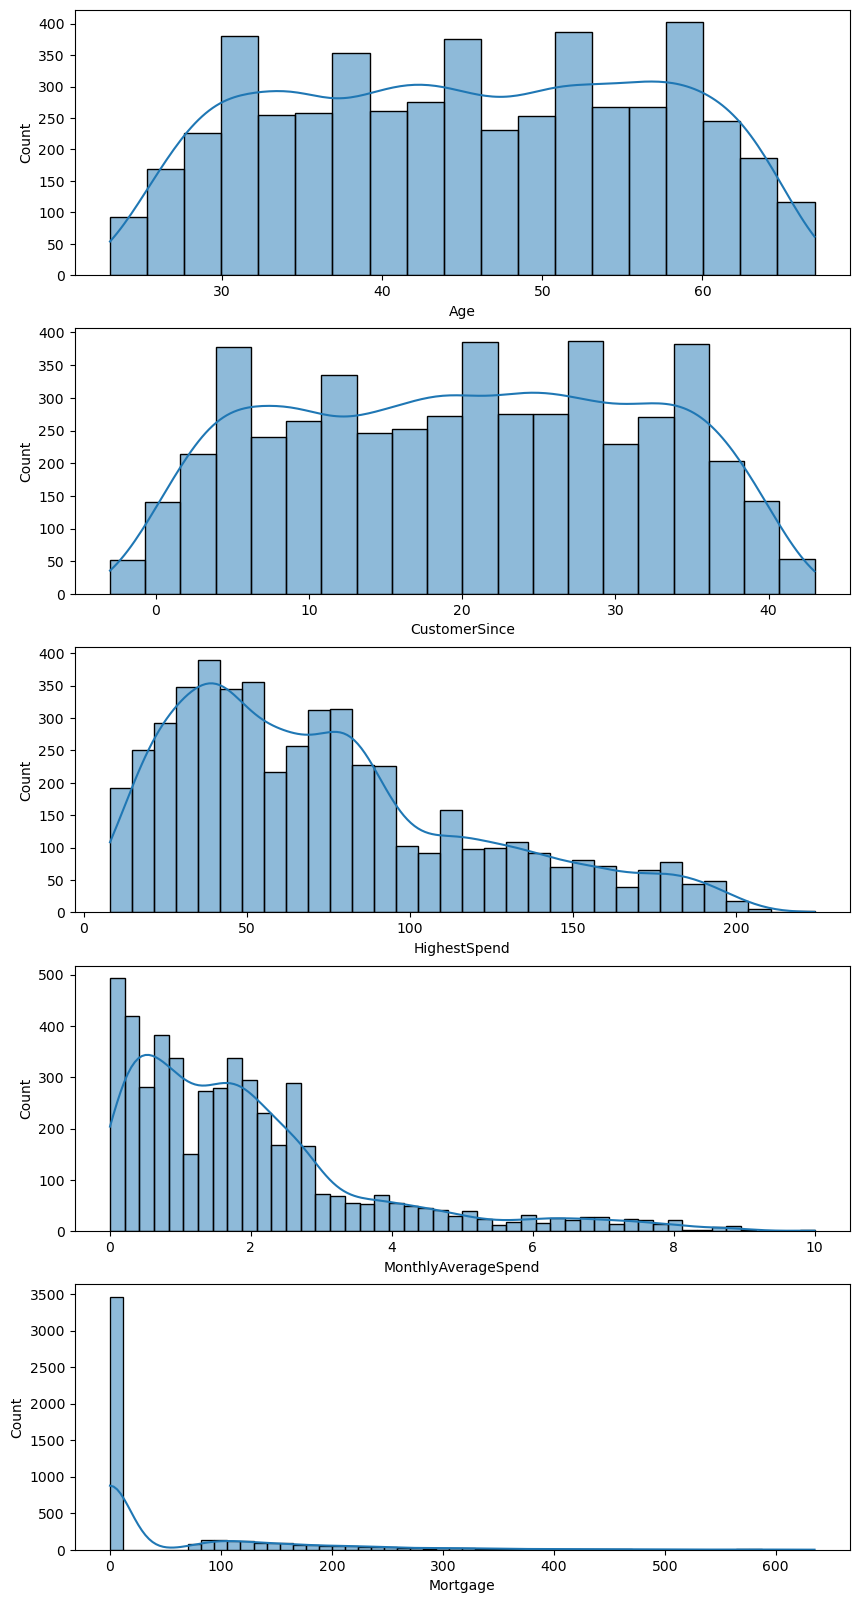

In [129]:
f5,(ax_box1,ax_box2,ax_box3,ax_box4,ax_box5)=plt.subplots(nrows=5,sharex=False,figsize=(10,20));
sns.histplot(data=df_data,x='Age',ax=ax_box1,fill = True,kde=True);
sns.histplot(data=df_data,x='CustomerSince',ax=ax_box2,fill = True,kde=True);
sns.histplot(data=df_data,x='HighestSpend',ax=ax_box3,fill = True,kde=True);
sns.histplot(data=df_data,x='MonthlyAverageSpend',ax=ax_box4,fill = True,kde=True);
sns.histplot(data=df_data,x='Mortgage',ax=ax_box5,fill = True,kde=True);

**Observations based on Visualization**
- Age and CustomerSince are highly correlated features
- HighestSpend: There are several outliers beyond 190, and is right skewed. People having Loan On Card have comparatively higher spend compared to people who dont have Loan on card.
- MonthlyAverageSpend: There are many outliers beyond 5, and is right skewed. People having Loan On Card have comparatively higher Monthly Average Spend compared to people who dont have Loan on card
- Mortgage: There are many outliers beyond 250, and is right skewed. People having Loan On Card have comparatively higher Mortgages compared to people who dont have Loan on card

In [130]:
df_data['LoanOnCard'].value_counts()

0.00    4500
1.00     480
Name: LoanOnCard, dtype: int64

In [131]:
df_data['LoanOnCard'].isna().sum()

20

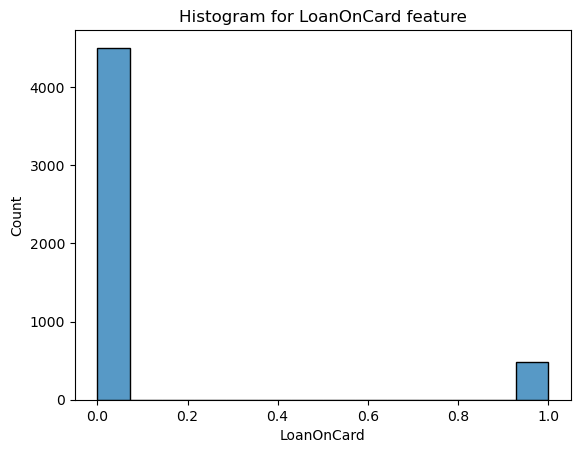

In [132]:
sns.histplot(data=df_data,x='LoanOnCard').set_title('Histogram for LoanOnCard feature');

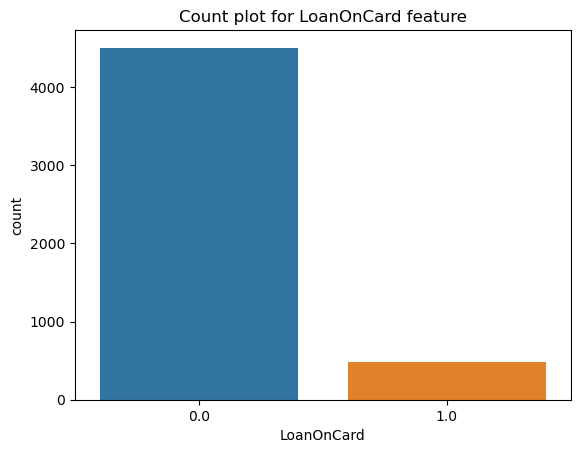

In [133]:
sns.countplot(data=df_data,x='LoanOnCard').set_title('Count plot for LoanOnCard feature');

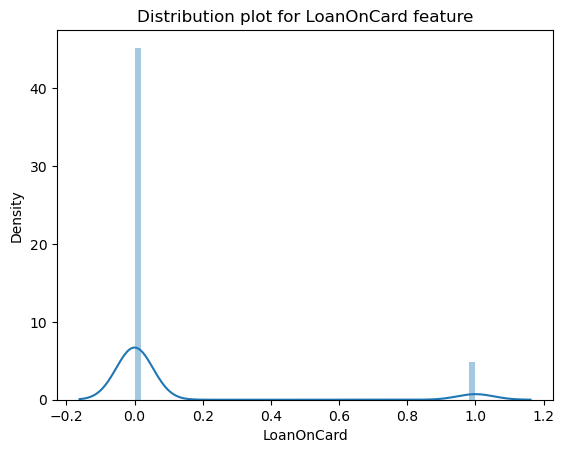

In [134]:
sns.distplot(df_data['LoanOnCard']).set_title('Distribution plot for LoanOnCard feature');

**So we see the LoanOnCard feature has 20 null entries, 4500 entries with value 0 and 480 entries with value 1.**

**Overall this a highly unbalanced dataset, with most of the customers havin no Loan on their card. This may result in inaccurate model** 

In [135]:
df_data.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

**So we see there are 20 missing values in the LoanOnCard feature. No other feature has missing data. We will drop the rows with Null values on LoanOnCard feature**

In [136]:
df_data.dropna(axis=0,inplace=True)

In [137]:
df_data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.90,3,0,0,0,0,0,1.00
10,11,65,39,105,94710,4,2.40,3,0,0,0,0,0,0.00
11,12,29,5,45,90277,3,0.10,2,0,0,0,1,0,0.00
12,13,48,23,114,93106,2,3.80,3,0,1,0,0,0,0.00
13,14,59,32,40,94920,4,2.50,2,0,0,0,1,0,0.00


In [138]:
df_data['LoanOnCard'].isna().sum()

0

In [139]:
df_data['LoanOnCard'].value_counts()

0.00    4500
1.00     480
Name: LoanOnCard, dtype: int64

**Now there are no missing values in the dataset**

In [140]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   object 
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   object 
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   object 
 10  FixedDepositAccount  4980 non-null   object 
 11  InternetBanking      4980 non-null   object 
 12  CreditCard           4980 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 583.6+ KB


**The following are the categorical variables in the dataset**
- HiddenScore
- Level
- Security
- FixedDepositAccount
- InternetBanking
- CreditCard

We will validate all these features to check for unexpected values

In [141]:
df_data['HiddenScore'].isna().sum()

0

In [142]:
# Checking HiddenScore feature
df_data["HiddenScore"].value_counts()

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64

In [143]:
df_data["HiddenScore"].unique()

array([1, 4, 3, 2], dtype=object)

<Axes: xlabel='HiddenScore', ylabel='count'>

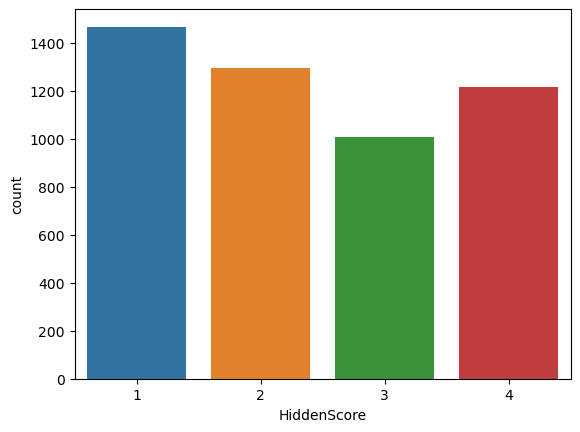

In [144]:
sns.countplot(data=df_data,x='HiddenScore')

**The HiddenScore feature has four possible vales (1,2,3,4), with no unexpected values**

In [145]:
df_data['Level'].isna().sum()

0

In [146]:
# Checking Level feature
df_data.Level.value_counts()

1    2089
3    1496
2    1395
Name: Level, dtype: int64

In [147]:
df_data["Level"].unique()

array([3, 2, 1], dtype=object)

<Axes: xlabel='Level', ylabel='count'>

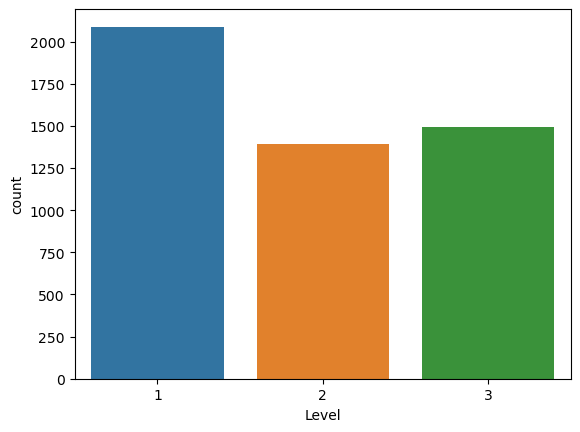

In [148]:
sns.countplot(data=df_data,x='Level')

**The Level feature has three possible vales (1,2,3), with no unexpected values**

In [149]:
df_data['Security'].isna().sum()

0

In [150]:
# Checking Security feature
df_data.Security.value_counts()

0    4460
1     520
Name: Security, dtype: int64

In [151]:
df_data["Security"].unique()

array([0, 1], dtype=object)

<Axes: xlabel='Security', ylabel='count'>

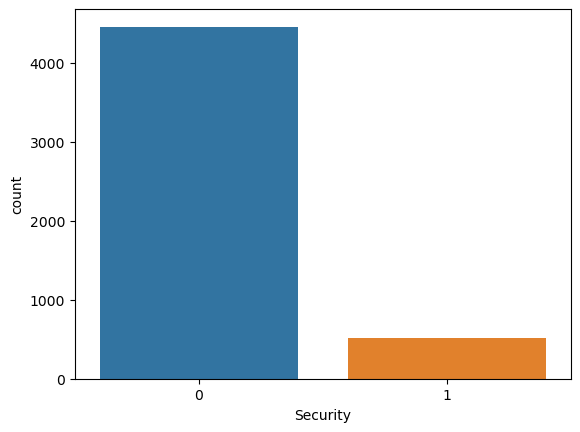

In [152]:
sns.countplot(data=df_data,x='Security')

**The Security feature has two possible vales (0,1), with no unexpected values**

In [153]:
df_data['FixedDepositAccount'].isna().sum()

0

In [154]:
# Checking FixedDepositAccount feature
df_data.FixedDepositAccount.value_counts()

0    4678
1     302
Name: FixedDepositAccount, dtype: int64

In [155]:
df_data["FixedDepositAccount"].unique()

array([0, 1], dtype=object)

<Axes: xlabel='FixedDepositAccount', ylabel='count'>

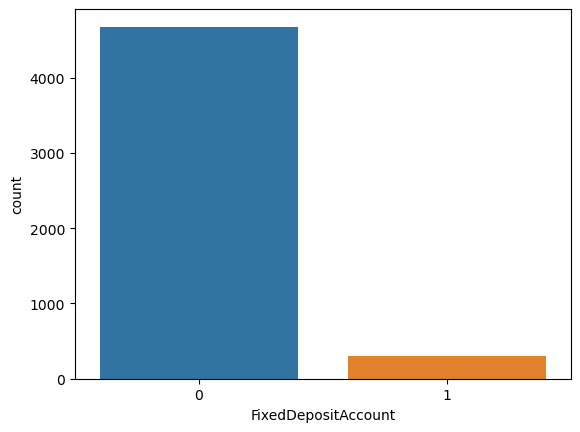

In [156]:
sns.countplot(data=df_data,x='FixedDepositAccount')

**The FixedDepositAccount feature has two possible vales (0,1), with no unexpected values**

In [157]:
df_data['InternetBanking'].isna().sum()

0

In [158]:
# Checking InternetBanking feature
df_data.InternetBanking.value_counts()

1    2974
0    2006
Name: InternetBanking, dtype: int64

In [159]:
df_data["InternetBanking"].unique()

array([0, 1], dtype=object)

<Axes: xlabel='InternetBanking', ylabel='count'>

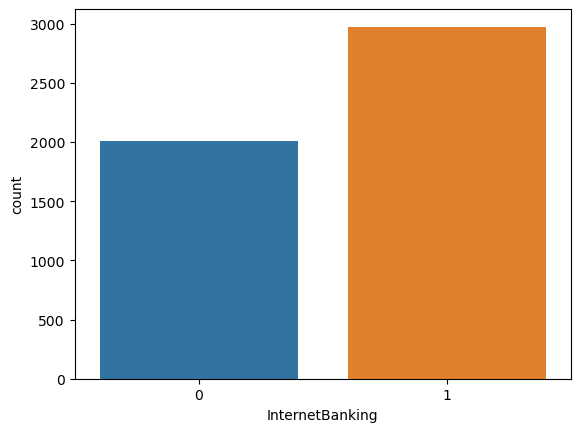

In [160]:
sns.countplot(data=df_data,x='InternetBanking')

**The InternetBanking feature has two possible vales (0,1), with no unexpected values**

In [161]:
df_data['CreditCard'].isna().sum()

0

In [162]:
# Checking CreditCard feature
df_data.CreditCard.value_counts()

0    3514
1    1466
Name: CreditCard, dtype: int64

In [163]:
df_data["CreditCard"].unique()

array([0, 1], dtype=object)

<Axes: xlabel='CreditCard', ylabel='count'>

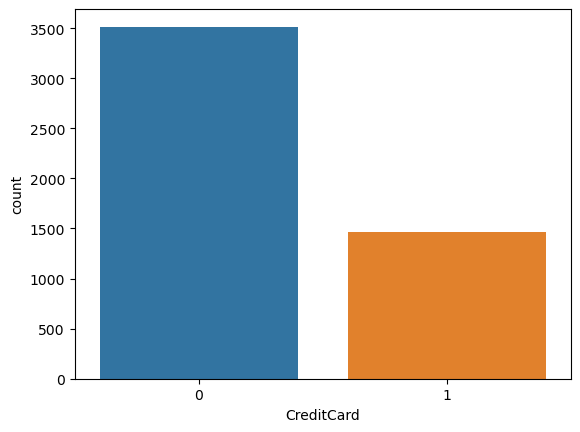

In [164]:
sns.countplot(data=df_data,x='CreditCard')

**The CreditCard feature has two possible vales (0,1), with no unexpected values**

**We'll analyze numerical features for LoanOnCard feature**

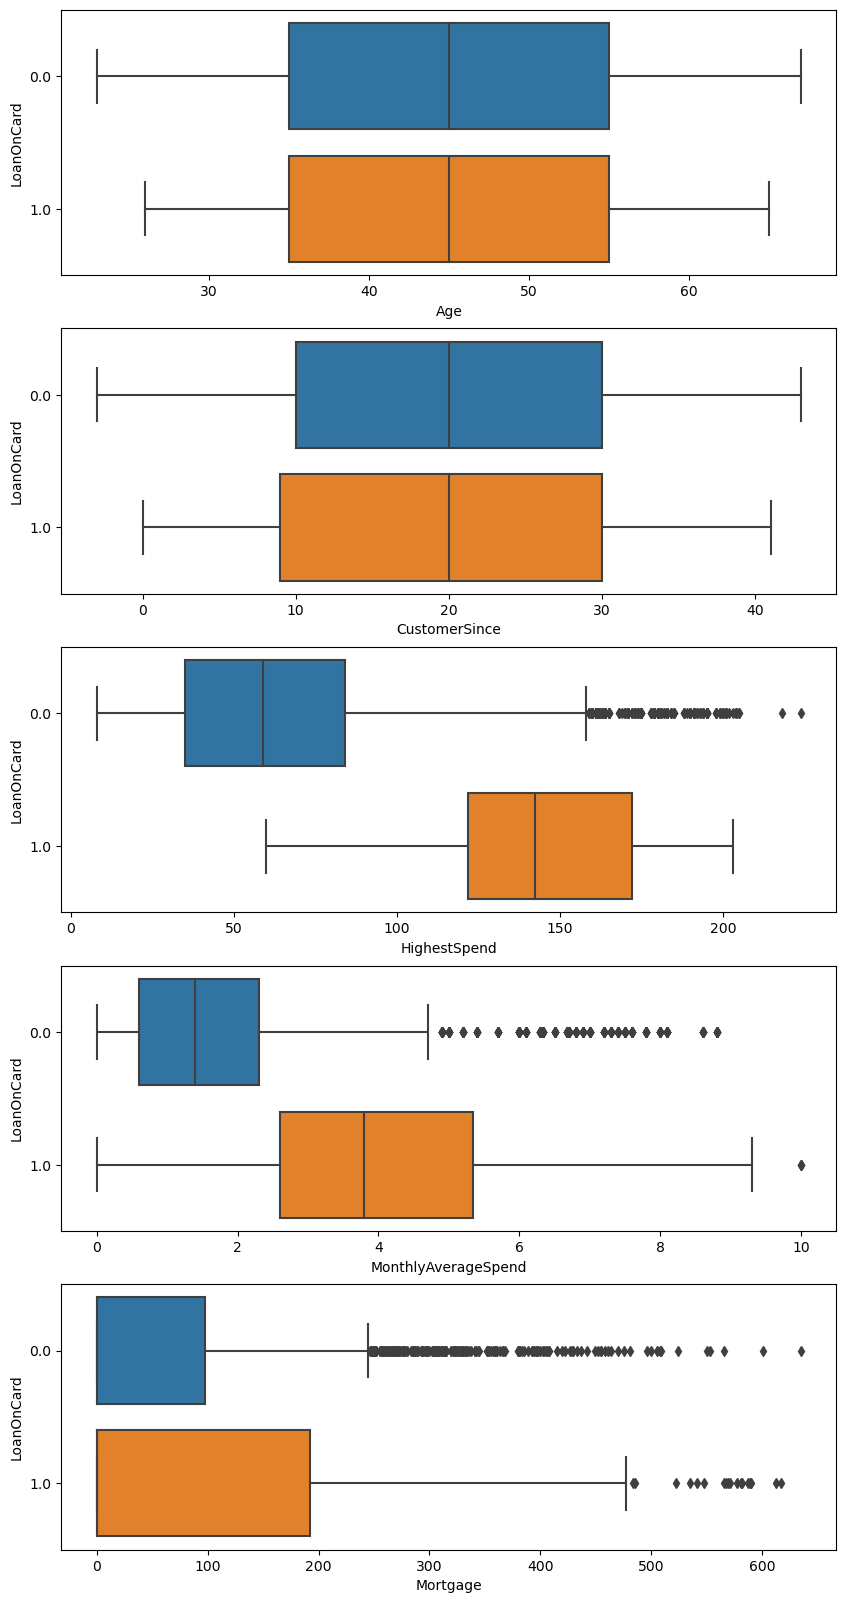

In [239]:
f5,(ax_box1,ax_box2,ax_box3,ax_box4,ax_box5)=plt.subplots(nrows=5,sharex=False,figsize=(10,20));
sns.boxplot(data=df_data,x='Age',y='LoanOnCard',ax=ax_box1);
sns.boxplot(data=df_data,x='CustomerSince',y='LoanOnCard',ax=ax_box2);
sns.boxplot(data=df_data,x='HighestSpend',y='LoanOnCard',ax=ax_box3);
sns.boxplot(data=df_data,x='MonthlyAverageSpend',y='LoanOnCard',ax=ax_box4);
sns.boxplot(data=df_data,x='Mortgage',y='LoanOnCard',ax=ax_box5);

- **There are outliers in the HighestSpend, MonthlyAverageSpend and Mortgage features, but we will not impute these features because they seem to be important for predicting whether the customer may need Loan On Card or not**
- **Imputation if required for outliers should be specified by a domain expert**

**LoanOnCard is the target variable and currently has data type float. We will update it to type Category.**

In [166]:
df_data['LoanOnCard']=df_data['LoanOnCard'].astype('category')

We'll drop ID and zipcode for X dataset. Also, to avoid collinearity we'll drop Age column because it highly correlated to CustomerSince column

In [167]:
from sklearn.model_selection import train_test_split
X=df_data.drop(['LoanOnCard','ID','ZipCode','Age'],axis=1) 
y=df_data[['LoanOnCard']]

**We will scale the only the numerical columns of the X dataframe for zscores. The categorical columns HiddenScore, Level, Security, FixedDepositAccount, InternetBanking and CreditCard are not continuous variables, so zscore scaling of these need not be done**

In [168]:
from scipy import stats
selected_columns = ['CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']
z_scores = stats.zscore(X[selected_columns])
scaled_df = pd.DataFrame(z_scores, columns=selected_columns)
X[selected_columns] = scaled_df

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.25)
X_train.head()
y_train.head()

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
3980,0.16,0.33,4,-0.31,2,-0.56,0,0,1,0
4489,-0.62,-1.15,3,-0.99,2,-0.56,0,0,1,0
4414,-1.06,2.26,3,3.75,1,-0.56,1,1,1,0
877,-0.80,-0.32,4,-1.05,2,-0.56,0,0,0,0
4390,0.51,-0.26,4,0.49,2,-0.56,0,0,1,0


,LoanOnCard
3980,0.00
4489,0.00
4414,1.00
877,0.00
4390,0.00


In [170]:
print('{0:.2f}% data is is training set'.format(len(X_train)*100/len(df_data)))
print('{0:.2f}% data is is testing set'.format(len(X_test)*100/len(df_data)))

75.00% data is is training set
25.00% data is is testing set


In [171]:
from sklearn.linear_model import LogisticRegression
logis_model=LogisticRegression()
logis_model.fit(X_train,y_train)

y_predict=logis_model.predict(X_test)

logis_model_score=logis_model.score(X_test,y_test)
print('Score of the trained model is: {0}'.format(logis_model_score))


LogisticRegression()

Score of the trained model is: 0.9518072289156626


In [172]:
coef_df = pd.DataFrame(logis_model.coef_)
coef_df['intercept'] = logis_model.intercept_
print('Coefficients of the trained model are: \n',coef_df)

Coefficients of the trained model are: 
      0    1    2    3    4    5     6    7     8     9  intercept
0 0.10 2.39 0.62 0.23 1.67 0.03 -0.61 3.24 -0.59 -0.78      -8.70


In [173]:
print('The score of the model on training data is: {0:0.2f}'.format(logis_model.score(X_train, y_train)));
print('The score of the model on test data is: {0:0.2f}'.format(logis_model.score(X_test, y_test)));

The score of the model on training data is: 0.95
The score of the model on test data is: 0.95


**Confusion Matrix**

<Figure size 700x500 with 0 Axes>

<Axes: >

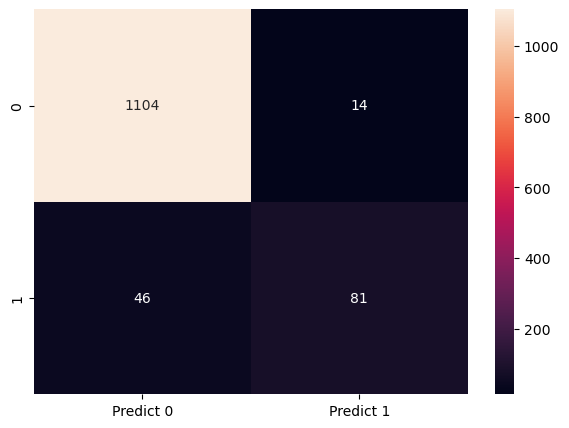

In [174]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_data_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_data_cm, annot=True,fmt='g')

From the Confusion Matrix we can observe that:
- The model predicted 1150 entries in the test data to have value 0, but 1104 entries actually had the value 0. Remaining 46 actually had the value 1
- The model predicted 95 entries in the test data to have value 1, but 81 entries actually had the value 1. Remaining 14 actually had the value 0

1. This shows, the accuracy of the model is high
2. Sensitivity or True Positive Rate is not very good


**Accuracy**

In [175]:
print('Accuracy of the trained model is: {0}'.format(logis_model_score))

Accuracy of the trained model is: 0.9518072289156626


**Precision**

In [176]:
Precision_logis = metrics.precision_score(y_test,y_predict)
print('The precision of the model is : {0:0.2f}'.format(Precision_logis))

The precision of the model is : 0.85


**Recall**

In [177]:
Recall_logis = metrics.recall_score(y_test,y_predict)
print('The Sensitivity of the model is : {0:0.2f}'.format(Recall_logis))

The Sensitivity of the model is : 0.64


**Sensitivity of the model is not good. This is because the training data was highly skewed with Class 0 for the dependent variable LoanOnCard.**

**F1-Score**

In [178]:
f1score_logis = metrics.f1_score(y_test,y_predict)
print('The f1-score of the model is : {0:0.2f}'.format(f1score_logis))

The f1-score of the model is : 0.73


**Classification Report**

In [179]:
print("Classification  Report for the Model:\n",metrics.classification_report(y_test,y_predict))

Classification  Report for the Model:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1118
         1.0       0.85      0.64      0.73       127

    accuracy                           0.95      1245
   macro avg       0.91      0.81      0.85      1245
weighted avg       0.95      0.95      0.95      1245



1. Even though the Accuracy of model is 95%, the Recall and F1-Score are low. This is due to imbalance in the data for LoanOnCard.
2. The model has a precision of 96% for class 0 and 85% for class 1
3. The model has sensitivity of 99% for class 0 and 64% for class 1
4. The model has f1-score of 97% for class 0 and 73% for class 1
5. Since F1-Score and Sensitivity for class 1 are low, we cannot consider the model to be good

**Distribution of the target variable in the training data**

In [180]:
print('Number of entries in training data with class 0 for dependent variable are {0}, out of the total of {1} entries'.format(y_train.value_counts()[0],len(y_train)))
print('Number of entries in training data with class 1 for dependent variable are {0}, out of the total of {1} entries'.format(y_train.value_counts()[1],len(y_train)))

Number of entries in training data with class 0 for dependent variable are 3382, out of the total of 3735 entries
Number of entries in training data with class 1 for dependent variable are 353, out of the total of 3735 entries


In [181]:
print('Class 0 forms {0}% of entries in the training data for the dependent variable'.format(y_train.value_counts()[0]*100/len(y_train)))
print('Class 1 forms {0}% of entries in the training data for the dependent variable'.format(y_train.value_counts()[1]*100/len(y_train)))

Class 0 forms 90.54886211512718% of entries in the training data for the dependent variable
Class 1 forms 9.451137884872825% of entries in the training data for the dependent variable


**We'll try the SMOTE oversampling technique for balancing the classes of the dependent variable LoanOnCard.**

In [182]:
from imblearn.over_sampling import SMOTE

In [183]:
X_train.info() #Identifying the categorical column numbers in X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3735 entries, 3980 to 255
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerSince        3735 non-null   float64
 1   HighestSpend         3735 non-null   float64
 2   HiddenScore          3735 non-null   object 
 3   MonthlyAverageSpend  3735 non-null   float64
 4   Level                3735 non-null   object 
 5   Mortgage             3735 non-null   float64
 6   Security             3735 non-null   object 
 7   FixedDepositAccount  3735 non-null   object 
 8   InternetBanking      3735 non-null   object 
 9   CreditCard           3735 non-null   object 
dtypes: float64(4), object(6)
memory usage: 321.0+ KB


In [184]:
sm=SMOTE(random_state=10)
X_sm_train,y_sm_train=sm.fit_resample(X_train,y_train) #Oversampling Training dataset using SMOTE

In [185]:
X_sm_train.shape

(6764, 10)

In [186]:
y_sm_train.value_counts()

LoanOnCard
0.0           3382
1.0           3382
dtype: int64

Now we see the data is balanced

**Training the Logistic Regression model using the balanced data generated using SMOTE**

In [187]:
sm_model=LogisticRegression()

sm_model.fit(X_sm_train,y_sm_train)

y_sm_predict=sm_model.predict(X_test)

LogisticRegression()

In [188]:
print('The score of the new model on training data is: {0:0.2f}'.format(sm_model.score(X_sm_train,y_sm_train)));
print('The score of the new model on test data is: {0:0.2f}'.format(sm_model.score(X_test, y_test)));

The score of the new model on training data is: 0.91
The score of the new model on test data is: 0.89


**Accuracy**

In [189]:
sm_model_score=sm_model.score(X_test,y_test)
print('Score of the trained model after SMOTE is: {0:0.2f}'.format(sm_model_score))

Score of the trained model after SMOTE is: 0.89


**Precision**

In [190]:
Precision_logis2 = metrics.precision_score(y_test,y_sm_predict)
print('The precision of the model after SMOTE is : {0:0.2f}'.format(Precision_logis2))

The precision of the model after SMOTE is : 0.47


**Recall**

In [191]:
Recall_logis2 = metrics.recall_score(y_test,y_sm_predict)
print('The Sensitivity of the model after SMOTE is : {0:0.2f}'.format(Recall_logis2))

The Sensitivity of the model after SMOTE is : 0.90


**F1-Score**

In [192]:
f1score_logis2 = metrics.f1_score(y_test,y_sm_predict)
print('The f1-score of the model after SMOTE is : {0:0.2f}'.format(f1score_logis2))

The f1-score of the model after SMOTE is : 0.62


**Classification Report**

In [193]:
print("Classification  Report for the Model after SMOTE is:\n",metrics.classification_report(y_test,y_sm_predict))


Classification  Report for the Model after SMOTE is:
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.93      1118
         1.0       0.47      0.90      0.62       127

    accuracy                           0.89      1245
   macro avg       0.73      0.89      0.78      1245
weighted avg       0.93      0.89      0.90      1245



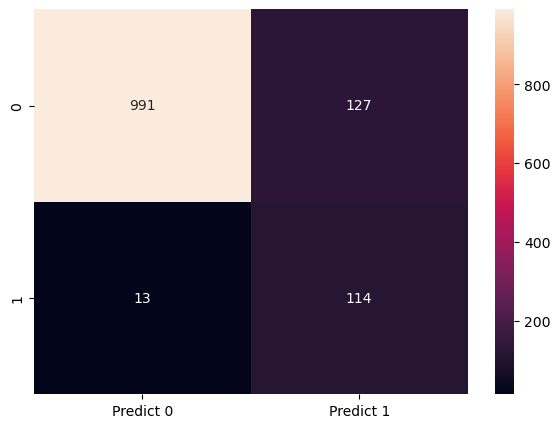

In [194]:
cm_sm=metrics.confusion_matrix(y_test, y_sm_predict, labels=[0,1])

df_sm_cm = pd.DataFrame(cm_sm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_sm_cm, annot=True,fmt='g');

**Summary**

1. Even though the Accuracy, Precision and F1-Score of model has reduced, the Recall has improved drastically.
2. The model now has a precision of 99% for class 0 vs 96% earlier and 47% for class 1 vs 85% earlier
3. The model now has sensitivity of 89% for class 0 vs 99% earlier and 90% for class 1 vs 64% earlier
4. The model has f1-score of 93% for class 0 vs 97% earlier and 62% for class 1 vs 73% earlier
5. The overall Accuracy of the model is 89% vs 95% earlier
6. True Positives have increased (114 vs 81 earlier) and False Negatives have decreased (13 vs 46 earlier)
6. With this model, the bank has a better chance of predicting whether a customer will need Loan on Card, which will help them increase their "Asset Customer" base.

In [195]:
print('\033[1mImprovement in Logistic Regression model performance after balancing is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((sm_model_score-logis_model_score)*100/logis_model_score))
print('\n******************************************\n')

print('Improvement in Precision is: {0:0.2f}'.format((Precision_logis2-Precision_logis)*100/Precision_logis))
    
print('\n******************************************\n')

print('Improvement in Recall is: {0:0.2f}'.format((Recall_logis2-Recall_logis)*100/Recall_logis))

print('\n******************************************\n')

print('Improvement in F1-Score is: {0:0.2f}'.format((f1score_logis2-f1score_logis)*100/f1score_logis))

Improvement in Logistic Regression model performance after balancing is as below:

Improvement in Accuracy = -6.75%

******************************************

Improvement in Precision is: -44.52

******************************************

Improvement in Recall is: 40.74

******************************************

Improvement in F1-Score is: -15.10


**Observations**:
- Accuracy of the model has decreased by 6.75%
- Precision of the model has decreased by 44.52%
- **Recall of the model has improved by 40.74%**
- F1-Score has decreased by 15.1%

**As we have seen earlier, an imbalanced dataset results in an imperfect model, so we'll use the balanced dataset (achieved using SMOTE) for SVM and KNN models.**

#### SVM

In [196]:
from sklearn import svm
clf1=svm.SVC() # Default SVM Model
clf1.fit(X_sm_train,y_sm_train)
y_pred_svm=clf1.predict(X_test)
print('Score for the trained SVM model: {0}'.format(metrics.accuracy_score(y_test, y_pred_svm)))

SVC()

Score for the trained SVM model: 0.9630522088353414


In [197]:
clf1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [198]:
print('The score of the new model on training data is: {0:0.2f}'.format(clf1.score(X_sm_train,y_sm_train)));
print('The score of the new model on test data is: {0:0.2f}'.format(clf1.score(X_test, y_test)));

The score of the new model on training data is: 0.98
The score of the new model on test data is: 0.96


**Accuracy**

In [199]:
print('Score for the SVM model: {0}'.format(metrics.accuracy_score(y_test, y_pred_svm)))

Score for the SVM model: 0.9630522088353414


**Precision**

In [200]:
Precision_svm = metrics.precision_score(y_test, y_pred_svm)
print('The precision of the SVM model is : {0:0.2f}'.format(Precision_svm))

The precision of the SVM model is : 0.76


**Recall**

In [201]:
Recall_svm = metrics.recall_score(y_test, y_pred_svm)
print('The Sensitivity of the SVM model is : {0:0.2f}'.format(Recall_svm))

The Sensitivity of the SVM model is : 0.94


**F1-Score**

In [202]:
f1score_svm = metrics.f1_score(y_test, y_pred_svm)
print('The f1-score of the SVM model is : {0:0.2f}'.format(f1score_svm))

The f1-score of the SVM model is : 0.84


**Classification Report**

In [203]:
print("Classification  Report for the SVM Model:\n",metrics.classification_report(y_test, y_pred_svm))

Classification  Report for the SVM Model:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1118
         1.0       0.76      0.94      0.84       127

    accuracy                           0.96      1245
   macro avg       0.88      0.95      0.91      1245
weighted avg       0.97      0.96      0.96      1245



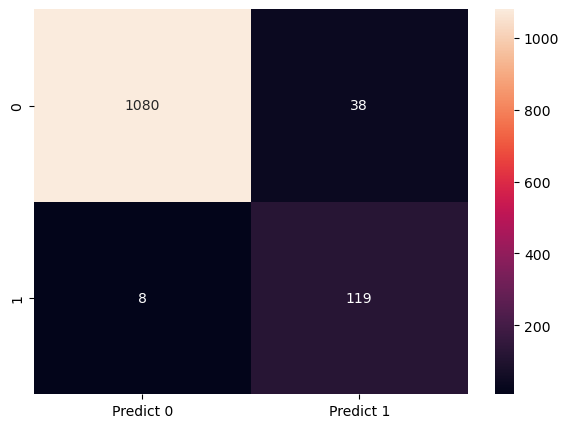

In [204]:
cm_svm=metrics.confusion_matrix(y_test, y_pred_svm, labels=[0,1])

df_svm_cm = pd.DataFrame(cm_svm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_svm_cm, annot=True,fmt='g');

**Summary of the SVM Model**

1. The model has a precision of 99% for class 0 and 76% for class 1
2. The model has sensitivity of 97% for class 0 and 94% for class 1
3. The model has f1-score of 98% for class 0 and 84% for class 1
4. Accuracy of the model is 96%
5. Overall this model can be considered a good model for the current use case of predicting an "Asset Base" customer. The model can predict with 94% accuracy, which customer may need a Loan On Card, and can help increase the revenue of the bank.

#### KNN

In [205]:
KNN=KNeighborsClassifier();
KNN.fit(X_sm_train,y_sm_train);
y_predict_knn=KNN.predict(X_test);

In [206]:
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [207]:
print('The score of the new model on training data is: {0:0.2f}'.format(KNN.score(X_sm_train,y_sm_train)));
print('The score of the new model on test data is: {0:0.2f}'.format(KNN.score(X_test, y_test)));

The score of the new model on training data is: 0.99
The score of the new model on test data is: 0.96


**Accuracy**

In [208]:
print('Score for the KNN model: {0}'.format(metrics.accuracy_score(y_test, y_predict_knn)))

Score for the KNN model: 0.9622489959839358


**Precision**

In [209]:
Precision_knn = metrics.precision_score(y_test, y_predict_knn)
print('The precision of the KNN model is : {0:0.2f}'.format(Precision_knn))

The precision of the KNN model is : 0.78


**Recall**

In [210]:
Recall_knn = metrics.recall_score(y_test, y_predict_knn)
print('The Sensitivity of the KNN model is : {0:0.2f}'.format(Recall_knn))

The Sensitivity of the KNN model is : 0.87


**F1-Score**

In [211]:
f1score_knn = metrics.f1_score(y_test, y_predict_knn)
print('The f1-score of the KNN model is : {0:0.2f}'.format(f1score_knn))

The f1-score of the KNN model is : 0.83


**Classification Report**

In [212]:
print("Classification  Report for the KNN Model:\n",metrics.classification_report(y_test, y_predict_knn))

Classification  Report for the KNN Model:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1118
         1.0       0.78      0.87      0.83       127

    accuracy                           0.96      1245
   macro avg       0.88      0.92      0.90      1245
weighted avg       0.96      0.96      0.96      1245



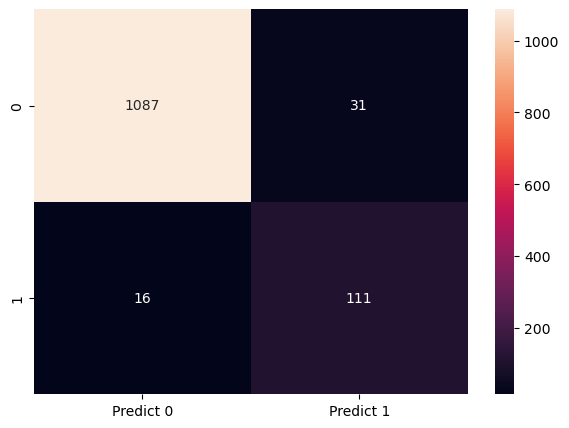

In [213]:
cm_knn=metrics.confusion_matrix(y_test, y_predict_knn, labels=[0,1])

df_knn_cm = pd.DataFrame(cm_knn, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_knn_cm, annot=True,fmt='g');

**Summary of the KNN Model**

1. The model has a precision of 99% for class 0 and 78% for class 1
2. The model has sensitivity of 97% for class 0 and 87% for class 1
3. The model has f1-score of 98% for class 0 and 83% for class 1
4. Accuracy of the model is 96%
5. The KNN model can also be considered a good model for the current use case of predicting an "Asset Base" customer. The model predicts 87% of times which customer may need a Loan On Card, and can help increase the revenue of the bank.

**Tuning SVM Model**

In [214]:
#setting the Hyperparameters range
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=15)
C=list(np.arange(10,31,1))
kernel=['rbf'] #We'll try out only the rbf kernel to optimize the tuning time
gamma=list(np.arange(0.01,0.051,0.005))

#Initializing the hyperparameters dictionary
hyperparameters_svm = dict(C=C,gamma=gamma,kernel=kernel)

svm2=svm.SVC()
svm_model = GridSearchCV(svm2, hyperparameters_svm, refit = True, verbose = 3, n_jobs=-1, cv=skf,scoring='recall')
#Fitting the model
best_model_svm = svm_model.fit(X_sm_train,y_sm_train)

Fitting 15 folds for each of 189 candidates, totalling 2835 fits


In [215]:
best_model_svm.best_score_

0.9923028515240905

In [216]:
best_model_svm.best_estimator_.get_params()

{'C': 24,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.049999999999999996,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [217]:
y_pred_svm_tuned=best_model_svm.predict(X_test)

In [218]:
print('The score of the new model on training data is: {0:0.2f}'.format(svm_model.score(X_sm_train,y_sm_train)));
print('The score of the new model on test data is: {0:0.2f}'.format(svm_model.score(X_test, y_test)));

The score of the new model on training data is: 0.99
The score of the new model on test data is: 0.92


In [219]:
print("Classification  Report for the Tuned SVM Model:\n",metrics.classification_report(y_test, y_pred_svm_tuned))

Classification  Report for the Tuned SVM Model:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1118
         1.0       0.83      0.92      0.87       127

    accuracy                           0.97      1245
   macro avg       0.91      0.95      0.93      1245
weighted avg       0.97      0.97      0.97      1245



**Tuning KNN Model**

In [220]:
skf = StratifiedKFold(n_splits=30)
#setting the Hyperparameters range

n_neighbors = list(np.arange(1,30,2)) #Initializing odd number of neighbors
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan']
p=[1,2,3,4]


#Initializing the hyperparameters dictionary
hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, metric=metric,p=p)

KNN_3 = KNeighborsClassifier()

clf_1 = GridSearchCV(KNN_3, hyperparameters, cv=skf, n_jobs=-1,scoring='recall', verbose=3,refit=True)
#Fitting the model
best_model_knn = clf_1.fit(X_sm_train,y_sm_train)

Fitting 30 folds for each of 360 candidates, totalling 10800 fits


In [221]:
y_predict_knn_tuned=best_model_knn.predict(X_test);

In [222]:
best_model_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [223]:
print('The score of the new model on training data is: {0:0.2f}'.format(clf_1.score(X_sm_train,y_sm_train)));
print('The score of the new model on test data is: {0:0.2f}'.format(clf_1.score(X_test, y_test)));

The score of the new model on training data is: 1.00
The score of the new model on test data is: 0.87


In [224]:
print("Classification  Report for the Tuned KNN Model:\n",metrics.classification_report(y_test, y_predict_knn_tuned))

Classification  Report for the Tuned KNN Model:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1118
         1.0       0.83      0.87      0.85       127

    accuracy                           0.97      1245
   macro avg       0.91      0.93      0.92      1245
weighted avg       0.97      0.97      0.97      1245



**Metrics for Tuned SVM Model:**

**Accuracy**

In [225]:
print('Score for the Tuned SVM model: {0}'.format(metrics.accuracy_score(y_test, y_pred_svm_tuned)))

Score for the Tuned SVM model: 0.9726907630522088


**Precision**

In [226]:
Precision_svm_tuned = metrics.precision_score(y_test, y_pred_svm_tuned)
print('The precision of the Tuned SVM model is : {0:0.2f}'.format(Precision_svm_tuned))

The precision of the Tuned SVM model is : 0.83


**Recall**

In [227]:
Recall_svm_tuned = metrics.recall_score(y_test, y_pred_svm_tuned)
print('The Sensitivity of the Tuned SVM model is : {0:0.2f}'.format(Recall_svm_tuned))

The Sensitivity of the Tuned SVM model is : 0.92


**F1-Score**

In [228]:
f1score_svm_tuned = metrics.f1_score(y_test, y_pred_svm_tuned)
print('The f1-score of the Tuned SVM model is : {0:0.2f}'.format(f1score_svm_tuned))

The f1-score of the Tuned SVM model is : 0.87


**Classification Report**

In [229]:
print("Classification  Report for the Tuned SVM Model:\n",metrics.classification_report(y_test, y_pred_svm_tuned))

Classification  Report for the Tuned SVM Model:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1118
         1.0       0.83      0.92      0.87       127

    accuracy                           0.97      1245
   macro avg       0.91      0.95      0.93      1245
weighted avg       0.97      0.97      0.97      1245



**Confusion Matrix**

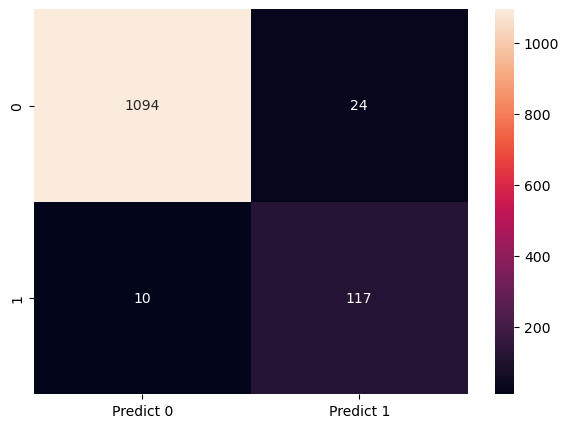

In [230]:
cm_svm_tuned=metrics.confusion_matrix(y_test, y_pred_svm_tuned, labels=[0,1])

df_svm_cm_tuned = pd.DataFrame(cm_svm_tuned, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_svm_cm_tuned, annot=True,fmt='g');

**Metrics for Tuned KNN Model**

**Accuracy**

In [231]:
print('Score for the Tuned KNN model: {0}'.format(metrics.accuracy_score(y_test, y_predict_knn_tuned)))

Score for the Tuned KNN model: 0.9686746987951808


**Precision**

In [232]:
Precision_knn_tuned = metrics.precision_score(y_test, y_predict_knn_tuned)
print('The precision of the Tuned KNN model is : {0:0.2f}'.format(Precision_knn_tuned))

The precision of the Tuned KNN model is : 0.83


**Recall**

In [233]:
Recall_knn_tuned = metrics.recall_score(y_test, y_predict_knn_tuned)
print('The Sensitivity of the Tuned KNN model is : {0:0.2f}'.format(Recall_knn_tuned))

The Sensitivity of the Tuned KNN model is : 0.87


**F1-Score**

In [234]:
f1score_knn_tuned = metrics.f1_score(y_test, y_predict_knn_tuned)
print('The f1-score of the Tuned KNN model is : {0:0.2f}'.format(f1score_knn_tuned))

The f1-score of the Tuned KNN model is : 0.85


**Classification Report**

In [235]:
print("Classification  Report for the Tuned KNN Model:\n",metrics.classification_report(y_test, y_predict_knn_tuned))

Classification  Report for the Tuned KNN Model:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1118
         1.0       0.83      0.87      0.85       127

    accuracy                           0.97      1245
   macro avg       0.91      0.93      0.92      1245
weighted avg       0.97      0.97      0.97      1245



**Confusion Matrix**

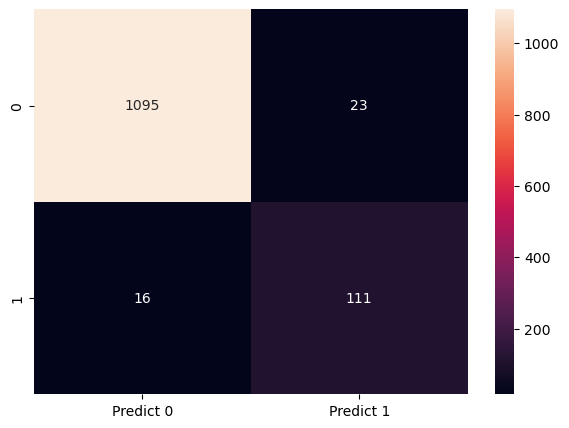

In [236]:
cm_svm=metrics.confusion_matrix(y_test, y_predict_knn_tuned, labels=[0,1])

df_svm_cm = pd.DataFrame(cm_svm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_svm_cm, annot=True,fmt='g');

**Improvement in SVM Model after hyperparameter tuning**

In [237]:
print('\033[1mImprovement in SVM model performance after tuning is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((metrics.accuracy_score(y_test, y_pred_svm_tuned)-metrics.accuracy_score(y_test, y_pred_svm))*100/metrics.accuracy_score(y_test, y_pred_svm)))
print('\n******************************************\n')

print('Improvement in Precision is: {0:0.2f}'.format((Precision_svm_tuned-Precision_svm)*100/Precision_svm))
    
print('\n******************************************\n')

print('Improvement in Recall is: {0:0.2f}'.format((Recall_svm_tuned-Recall_svm)*100/Recall_svm))

print('\n******************************************\n')

print('Improvement in F1-Score is: {0:0.2f}'.format((f1score_svm_tuned-f1score_svm)*100/f1score_svm))

Improvement in SVM model performance after tuning is as below:

Improvement in Accuracy = 1.00%

******************************************

Improvement in Precision is: 9.48

******************************************

Improvement in Recall is: -1.68

******************************************

Improvement in F1-Score is: 4.19


**Observations on the tuned SVM model**
- The Default SVM Model performed quite well with the excellent values on all parameters (Precision, Recall, Accuracy and F1-Score)
- By tuning the SVM model with GridSearchCV we are able to improve on Accuracy, Precision and F1-Score of the model.
- There is slight deterioration in the Recall value. The Recall value was 94% earlier, and is 92% now. Even with this reduction, the Recall is quite good for the tuned model.
- Accuracy of the model improved marginally by 1%
- Precision improved by 9.48%
- F1-Score improved by 4.19%
- The tuned model has a precision of 99% for No Loan on Card, and 83% for a loan on card
- The model has a Sensitivity of 98% for No loan on card and 92% for a loan on card
- The model has F1-Score of 98% for no loan on card and 87% for a loan on card
- Accuracy of the model is 97%
- So we see tuning of the model has resulted in improving other metrics, with slight deterioration in Sensitivity. The Sensitivity of the model is still quite high. Overall the tuned model can be considered as a good model.

**Improvement in KNN Model after hyperparameter tuning**

In [238]:
print('\033[1mImprovement in KNN model performance after tuning is as below:\033[0m\n')

print('Improvement in Accuracy = {0:0.2f}%'.format((metrics.accuracy_score(y_test, y_predict_knn_tuned)-metrics.accuracy_score(y_test, y_predict_knn))*100/metrics.accuracy_score(y_test, y_predict_knn)))
print('\n******************************************\n')

print('Improvement in Precision is: {0:0.2f}'.format((Precision_knn_tuned-Precision_knn)*100/Precision_knn))
    
print('\n******************************************\n')

print('Improvement in Recall is: {0:0.2f}'.format((Recall_knn_tuned-Recall_knn)*100/Recall_knn))

print('\n******************************************\n')

print('Improvement in F1-Score is: {0:0.2f}'.format((f1score_knn_tuned-f1score_knn)*100/f1score_knn))

Improvement in KNN model performance after tuning is as below:

Improvement in Accuracy = 0.67%

******************************************

Improvement in Precision is: 5.97

******************************************

Improvement in Recall is: 0.00

******************************************

Improvement in F1-Score is: 3.07


**Observations on the tuned KNN model**
- The Default KNN Model had good performance with the balanced data on all parameters (Precision, Recall, Accuracy and F1-Score)
- By tuning the KNN model with GridSearchCV we are able to improve on Accuracy, Precision and F1-Score of the model, While retaining the same Recall value.
- Accuracy of the model improved marginally by 0.67%
- Precision improved by 5.97%
- There was no change in the recall value
- F1-Score improved by 3.07%
- The tuned model has a precision of 99% for No Loan on Card, and 83% for a loan on card
- The model has a Sensitivity of 98% for No loan on card and 87% for a loan on card
- The model has F1-Score of 98% for no loan on card and 85% for a loan on card
- Accuracy of the model is 97%
- So we see tuning has improved on other the metrics while retaining the Sensitivity of the model. So this is a better model compared to the default KNN model.

**Overall Observations**
- After training various classification models, we can say that:
    - It is important to balance the output class of data before training the model
    - SVM model performed the best on the dataset.
    - KNN and Logistic Regression models also performed well
    - The SVM model is very well balanced, with high scores on all evaluation metrics
    - The SVM model can be adopted by the bank to improve their asset class customer base